In [1]:
import random
import pandas as pd
import numpy as np
import ml_utils 

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

## 3950 Assignment 1: Part 2

For this assignment we want to use some sort of tree based model to classify the data below. We have a very small training set, so overfitting is a very real concern. 

Some specifics for this assignment:
<ul>
<li>Please use the show_eda to control if EDA stuff is shown. I don't really need to see all the EDA stuff (nor do you after you've done it), so we can make it configurable with a variable to speed up time. Please set this FALSE when you submit, so I can run all and see the outcome without histograms etc...
<li>Please ensure that whatever model you end up with is in a variable named best at the end.
<li>Please use some pipeline in prepping the data. The test data is in an identical format to the training data, so whatever pipeline you've created for your training will work for the testing. 
<li>The accuracy scoring will be an average of accuracy and roc_auc. 
</ul>

### Grading Metrics
<ul>
<li><b>Pipeline Used - 10pts</b> The data loading needs to be in a pipeline. See the test part for illustration. When testing I'll call your pipe with the new data (format is identical to training), so any prep stuff should be in the pipeline. 
<li><b>Tree Based Model Used - 5pts</b> The model used for classification needs to be some variety of tree, beyond that it is up to you. 
<li><b>Accuracy - 5pts</b> The final accuracy acheived. This will be a rough ranking, I'm assuming most people will get a similar level of accuracy, marks will only be deducted if yours is far wosrse, as that's an indication that you probably didn't take any/many steps to improve things. 
<li><b>Clarity and Formatting - 5pts</b> Is it organized and can I read it?
    <ul>
    <li> <b>Note:</b> for this assignment, and in general, please get rid of my comments and replace them with your own. I'm going to read this, so all of these instructions aren't really required. Think of this as a template, get rid of the stuff that isn't needed, and leave only the things you need to explain your code. 
    </ul>
</ul>

For submission, please drop the URL for your repository in the dropbox.

In [2]:
name = "Darren Lee"

show_eda = False

In [3]:
#Load data
df = pd.read_csv("training.csv")
df = df.drop(columns={"id"})
df.sample(5)

,target,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,var_200
31,1,0.012,0.508,0.351,0.761,0.904,0.797,0.836,0.500,0.353,...,0.264,0.639,0.165,0.076,0.566,0.364,0.357,0.653,0.626,0.066
175,0,0.727,0.462,0.184,0.176,0.915,0.991,0.575,0.324,0.762,...,0.473,0.802,0.308,0.747,0.248,0.230,0.014,0.907,0.182,0.435
242,0,0.040,0.211,0.379,0.776,0.068,0.180,0.563,0.191,0.168,...,0.849,0.210,0.980,0.545,0.919,0.525,0.708,0.601,0.282,0.092
29,0,0.602,0.918,0.574,0.737,0.044,0.170,0.341,0.115,0.124,...,0.201,0.989,0.638,0.090,0.227,0.274,0.945,0.930,0.666,0.322
24,0,0.379,0.007,0.554,0.553,0.823,0.648,0.961,0.596,0.151,...,0.500,0.263,0.801,0.143,0.939,0.020,0.559,0.030,0.044,0.657


### EDA ###

In [4]:
df.shape

(250, 201)

In [5]:
df_eda = ml_utils.edaDF(df, "target")
df_eda.setCat([])
df_eda.setNum(df.columns[1:])

In [6]:
if show_eda:
    df_eda.fullEDA(pairplot=False)

Conclusions from EDA: 
<ul>
    <li> Dataset seems relatively balanced
    <li> Most values appear to be between 0 and 1
    <li> Doesn't seem to be any categorical variables
</ul>

### Create Model ###

Train Test Split

In [7]:
y = np.array(df["target"]).reshape(-1,1)
x = np.array(df.drop(columns={"target"}))

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

Data Prep Pipeline

In [8]:
prep = Pipeline( steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", MinMaxScaler()) # Don't know the distriutions of all the features so I am using MinMaxScaler()
    ])

Model will use Decision Tree Classifier

In [9]:
clf = DecisionTreeClassifier(random_state=0)

##### First Iteration of the Tree Model #####

In [10]:
pipeline_steps = [
    ('Prep', prep),
    ('DT', clf)
    ]
    
model1 = Pipeline(pipeline_steps)

Depth: 9
Leaves: 22
Training Accuracy: 1.0
Testing Accuracy: 0.5257575757575758 0.5238095238095238


[Text(0.34517045454545453, 0.95, 'var_177 <= 0.113\ngini = 0.499\nsamples = 187\nvalue = [89, 98]\nclass = True'),
 Text(0.13068181818181818, 0.85, 'var_141 <= 0.153\ngini = 0.231\nsamples = 30\nvalue = [4, 26]\nclass = True'),
 Text(0.08522727272727272, 0.75, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = False'),
 Text(0.17613636363636365, 0.75, 'var_152 <= 0.941\ngini = 0.071\nsamples = 27\nvalue = [1, 26]\nclass = True'),
 Text(0.13068181818181818, 0.65, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]\nclass = True'),
 Text(0.2215909090909091, 0.65, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = False'),
 Text(0.5596590909090909, 0.85, 'var_199 <= 0.857\ngini = 0.497\nsamples = 157\nvalue = [85, 72]\nclass = False'),
 Text(0.35795454545454547, 0.75, 'var_152 <= 0.848\ngini = 0.477\nsamples = 130\nvalue = [79, 51]\nclass = False'),
 Text(0.3125, 0.65, 'var_133 <= 0.33\ngini = 0.496\nsamples = 112\nvalue = [61, 51]\nclass = False'),
 Text(0.09090909090909091, 0.55, 'var_148 <= 0.098

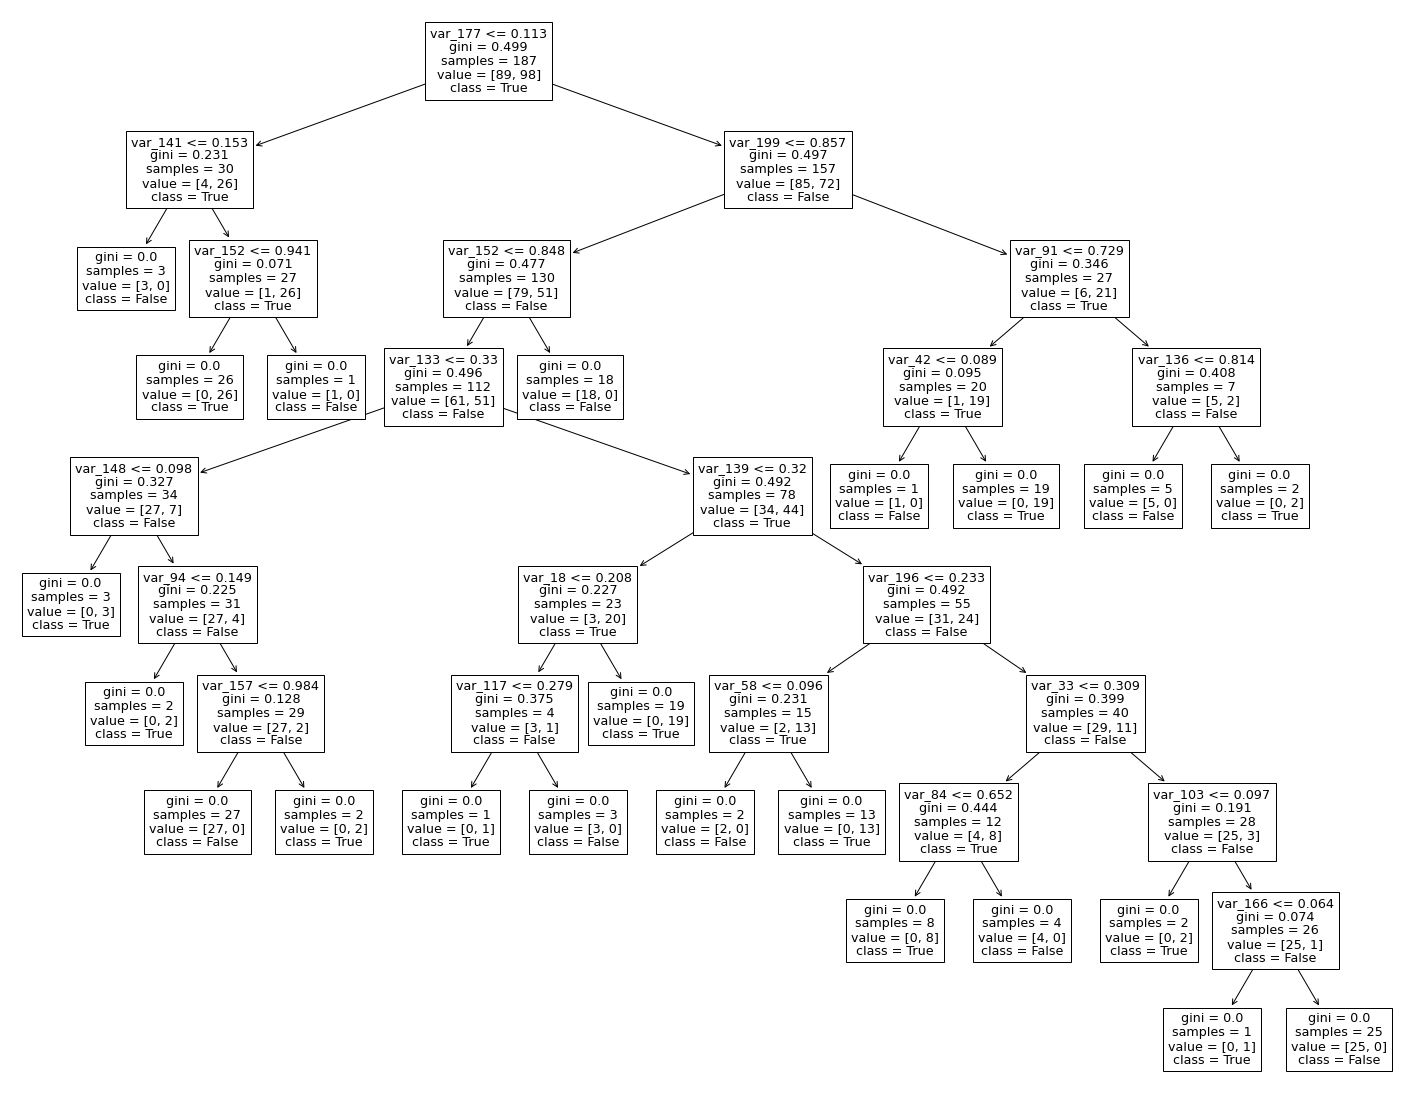

In [11]:
model1.fit(x_train, y_train)
predictions = model1.predict(x_test)

print("Depth:", model1[1].get_depth()) 
print("Leaves:", model1[1].get_n_leaves())
print("Training Accuracy:", model1.score(x_train, y_train))
print("Testing Accuracy:", roc_auc_score(y_test, predictions), accuracy_score(y_test, predictions))
plt.figure(figsize=(25,20))
plot_tree(model1[1], feature_names=df.columns[:-1], class_names=["False","True"])

Tree looks overfitted since many leaves contain small number of samples to that are perfectly split

##### Combatting Overfitting #####
<ul>
<li> Combat by using RandomizedSearchCV to figure out best combination of tree hyperparameters.
</ul>

In [12]:
tree_para = {
    'DT__max_depth':[i for i in range(2,11)],
    'DT__min_samples_split':[i for i in range(2,11)],
    'DT__min_samples_leaf':[i for i in range(2,11)],
    'DT__max_leaf_nodes': [i for i in range(2,31)],
    'DT__criterion':["gini", "entropy"]
    }
best = RandomizedSearchCV(estimator=model1, param_distributions=tree_para, cv=5, n_jobs=-1, n_iter=1000)
best.fit(x_train, y_train)
predictions2 = best.predict(x_test)

print(best.best_estimator_[1])
print("Training Accuracy:", best.score(x_train, y_train))
print("Testing Accuracy:", roc_auc_score(y_test, predictions2), accuracy_score(y_test, predictions2))

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=26, min_samples_leaf=3,
                       min_samples_split=8, random_state=0)
Training Accuracy: 0.9411764705882353
Testing Accuracy: 0.5075757575757576 0.5079365079365079


Sometimes the model with hyperparameter tuning acheives better accuracy than the first model that does not have hyperparameter tuning. However, sometimes the opposite is true. This is likely due to variability in the Train Test Split as well as the RandomizedSearchCV and the Decision Tree Classifier

Here is a plot of a the tree with hyperparameter tuning using RandomizedSearchCV:

[Text(0.32516339869281047, 0.9444444444444444, 'var_177 <= 0.113\ngini = 0.499\nsamples = 187\nvalue = [89, 98]\nclass = True'),
 Text(0.10457516339869281, 0.8333333333333334, 'var_141 <= 0.153\ngini = 0.231\nsamples = 30\nvalue = [4, 26]\nclass = True'),
 Text(0.05228758169934641, 0.7222222222222222, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = False'),
 Text(0.1568627450980392, 0.7222222222222222, 'var_178 <= 0.933\ngini = 0.071\nsamples = 27\nvalue = [1, 26]\nclass = True'),
 Text(0.10457516339869281, 0.6111111111111112, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]\nclass = True'),
 Text(0.20915032679738563, 0.6111111111111112, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = True'),
 Text(0.545751633986928, 0.8333333333333334, 'var_199 <= 0.857\ngini = 0.497\nsamples = 157\nvalue = [85, 72]\nclass = False'),
 Text(0.3660130718954248, 0.7222222222222222, 'var_152 <= 0.848\ngini = 0.477\nsamples = 130\nvalue = [79, 51]\nclass = False'),
 Text(0.3137254901960784, 0.6111111111111

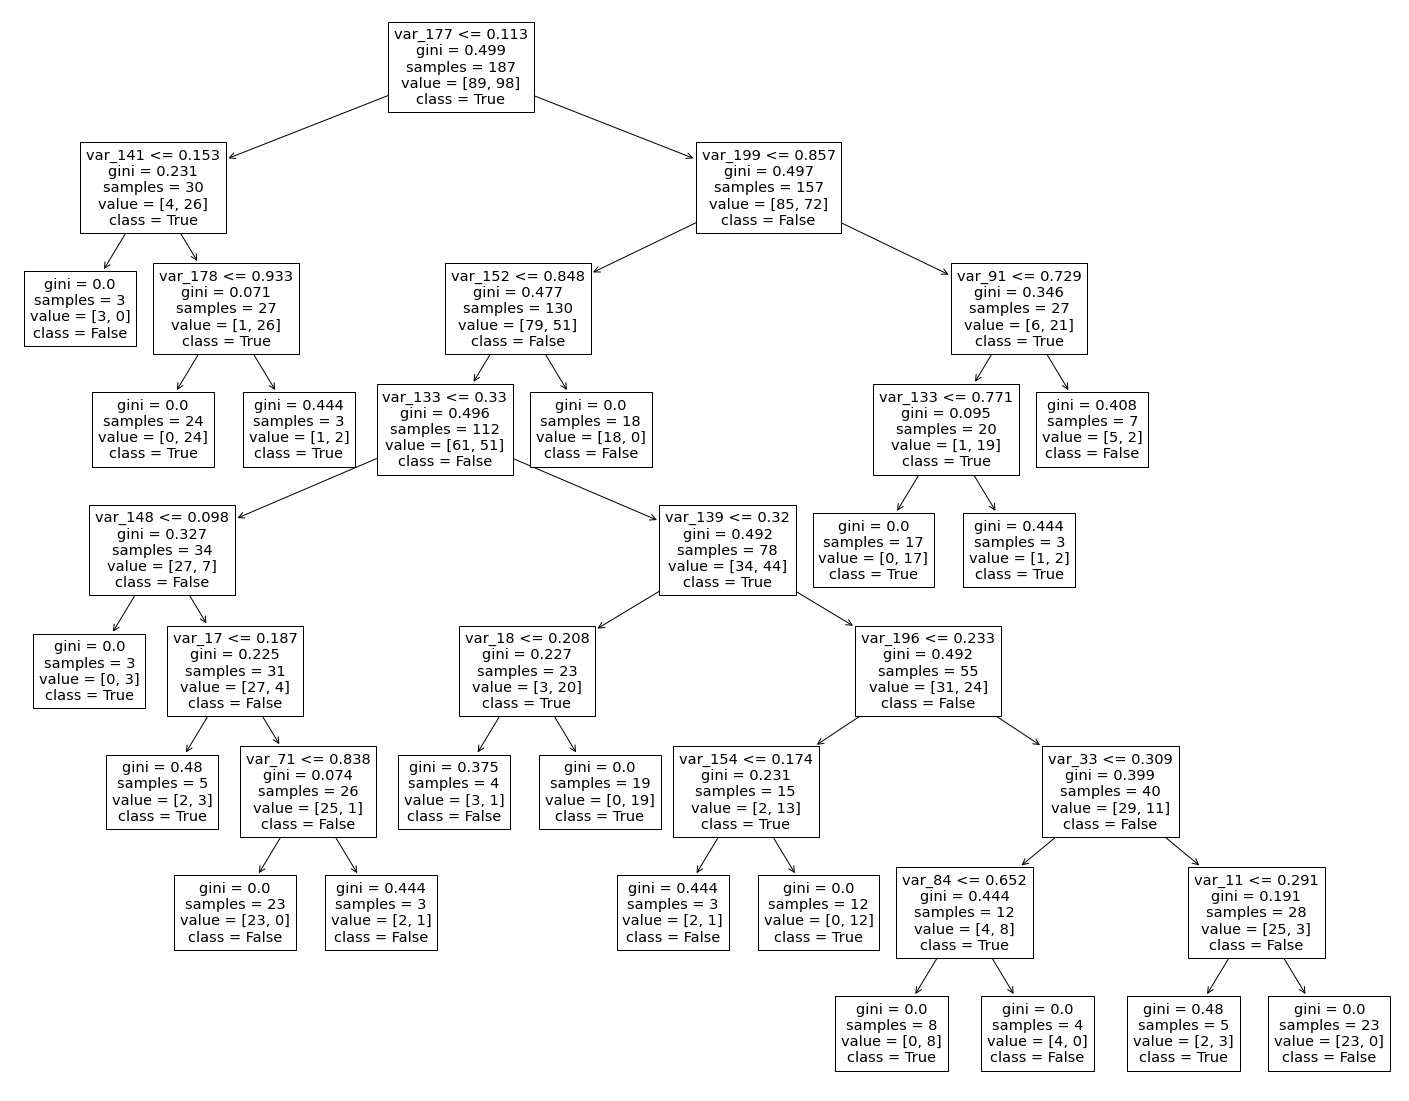

In [13]:
plt.figure(figsize=(25,20))
plot_tree(best.best_estimator_[1], feature_names=df.columns[:-1], class_names=["False","True"])

### Testing

Please leave the stuff below as-is in your file. 

This will take your best model and score it with the test data. If you want to test to make sure that yours works, make a copy of the data file and rename it testing.csv, then make sure this runs ok. I will do the same, but the contents of my test file will be different. 

In [14]:
# Load Test Data
test_df = pd.read_csv("testing.csv")
test_df = test_df.drop(columns={"id"})
# Create tests and score
test_y = np.array(test_df["target"]).reshape(-1,1)
test_X = np.array(test_df.drop(columns={"target"}))

preds = best.predict(test_X)

roc_score = roc_auc_score(test_y, preds)
acc_score = accuracy_score(test_y, preds)

print(roc_score)
print(acc_score)
print(name, np.mean([roc_score, acc_score]))


0.8316120341266277
0.832
Darren Lee 0.8318060170633138


### What Accuracy Changes Were Used

Please list here what you did to try to increase accuracy and/or limit overfitting:
<ul>
<li> Implement hyperarameter tuning into the model by using RandomizedSearchCV to test a wider range of parameters using less resources. (depth, minimum samples needed to create leaf, minimum samples required to split a node, gini/entropy)
<li> Run multiple tests to figure out list reasonable list of parameters.
<li> Implement scaling in pipeline
</ul>